In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import mplhep as hep
hep.style.use("CMS")

plt.rcParams['figure.facecolor']='white'
plt.rcParams['savefig.facecolor']='white'
plt.rcParams['savefig.bbox']='tight'

plt.rcParams["figure.figsize"] = (7, 7)


In [6]:
import uproot as ur
arrays_sim = ur.open(f'../EICrecon/test_eicrecon.root:events').arrays()
print(arrays_sim.fields)


['HcalFarForwardZDCClusters.type', 'HcalFarForwardZDCClusters.energy', 'HcalFarForwardZDCClusters.energyError', 'HcalFarForwardZDCClusters.time', 'HcalFarForwardZDCClusters.timeError', 'HcalFarForwardZDCClusters.nhits', 'HcalFarForwardZDCClusters.position.x', 'HcalFarForwardZDCClusters.position.y', 'HcalFarForwardZDCClusters.position.z', 'HcalFarForwardZDCClusters.positionError.xx', 'HcalFarForwardZDCClusters.positionError.yy', 'HcalFarForwardZDCClusters.positionError.zz', 'HcalFarForwardZDCClusters.positionError.xy', 'HcalFarForwardZDCClusters.positionError.xz', 'HcalFarForwardZDCClusters.positionError.yz', 'HcalFarForwardZDCClusters.intrinsicTheta', 'HcalFarForwardZDCClusters.intrinsicPhi', 'HcalFarForwardZDCClusters.intrinsicDirectionError.xx', 'HcalFarForwardZDCClusters.intrinsicDirectionError.yy', 'HcalFarForwardZDCClusters.intrinsicDirectionError.xy', 'HcalFarForwardZDCClusters.shapeParameters_begin', 'HcalFarForwardZDCClusters.shapeParameters_end', 'HcalFarForwardZDCClusters.hit

In [36]:
shapeParameters={}
for i in range(10):
    shapeParameters[i]=[]
for i in range(100):
    E=arrays_sim["HcalFarForwardZDCClusters.energy"][i]
    maxE=np.max(E)
    for j in range(len(E)):
        if E[j]== maxE:
            break
    
    #for j in range(len(arrays_sim["HcalFarForwardZDCClusters.energy"][i])):
    b=arrays_sim["HcalFarForwardZDCClusters.shapeParameters_begin"][i][j]
    #exclude bad clusters

    for k in range(10):
        shapeParameters[k].append(arrays_sim["_HcalFarForwardZDCClusters_shapeParameters"][i][b+k])

In [37]:
for i in range(10):
    shapeParameters[i]=np.array(shapeParameters[i])

In [44]:
radii = shapeParameters[0]
dispersion = shapeParameters[1]
eig2d_1 = shapeParameters[2]*(shapeParameters[2]>shapeParameters[3])\
                    +shapeParameters[3]*(shapeParameters[3]>=shapeParameters[2])
eig2d_2 = shapeParameters[3]*(shapeParameters[2]>shapeParameters[3])\
                    +shapeParameters[2]*(shapeParameters[3]>=shapeParameters[2])

eig3d_1 = shapeParameters[4]*((shapeParameters[4]>shapeParameters[5])&(shapeParameters[4]>shapeParameters[6]))\
                    +shapeParameters[5]*((shapeParameters[5]>shapeParameters[4])&(shapeParameters[5]>shapeParameters[6]))\
                    +shapeParameters[6]*((shapeParameters[6]>shapeParameters[4])&(shapeParameters[6]>shapeParameters[5]))
eig3d_2 = shapeParameters[4]*((shapeParameters[4]>shapeParameters[5])^(shapeParameters[4]>shapeParameters[6]))\
                    +shapeParameters[5]*((shapeParameters[5]>shapeParameters[4])^(shapeParameters[5]>shapeParameters[6]))\
                    +shapeParameters[6]*((shapeParameters[6]>shapeParameters[4])^(shapeParameters[6]>shapeParameters[5]))
eig3d_3 = shapeParameters[4]*((shapeParameters[4]<shapeParameters[5])&(shapeParameters[4]<shapeParameters[6]))\
                    +shapeParameters[5]*((shapeParameters[5]<shapeParameters[4])&(shapeParameters[5]<shapeParameters[6]))\
                    +shapeParameters[6]*((shapeParameters[6]<shapeParameters[4])&(shapeParameters[6]<shapeParameters[5]))
axis_x = shapeParameters[7]
axis_y =shapeParameters[8]
axis_z =shapeParameters[9]

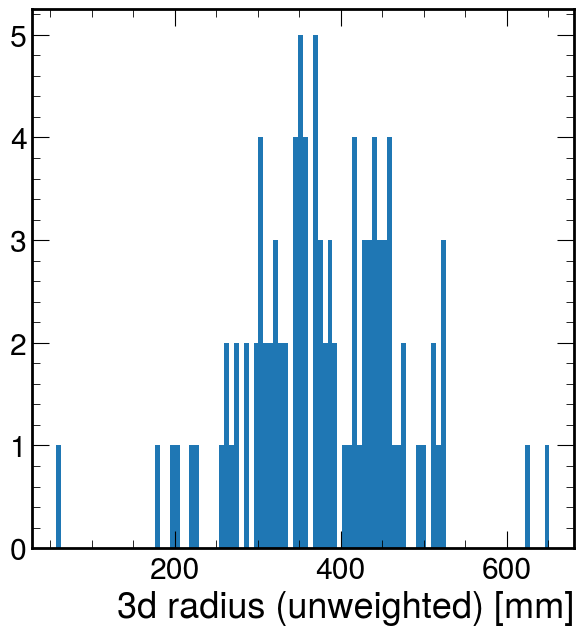

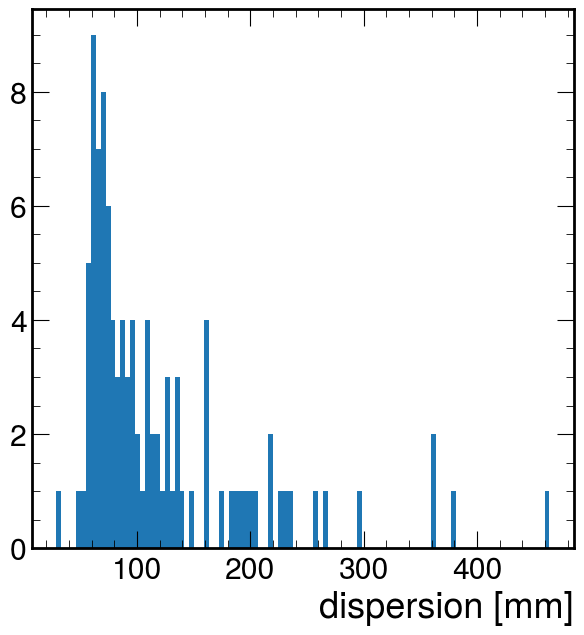

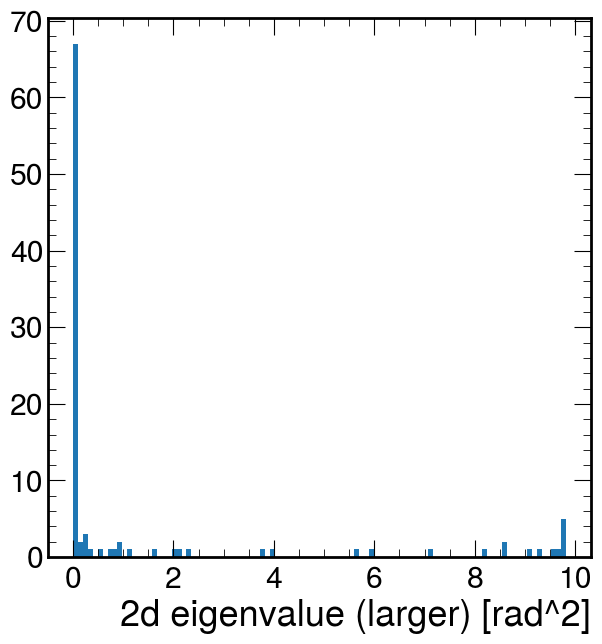

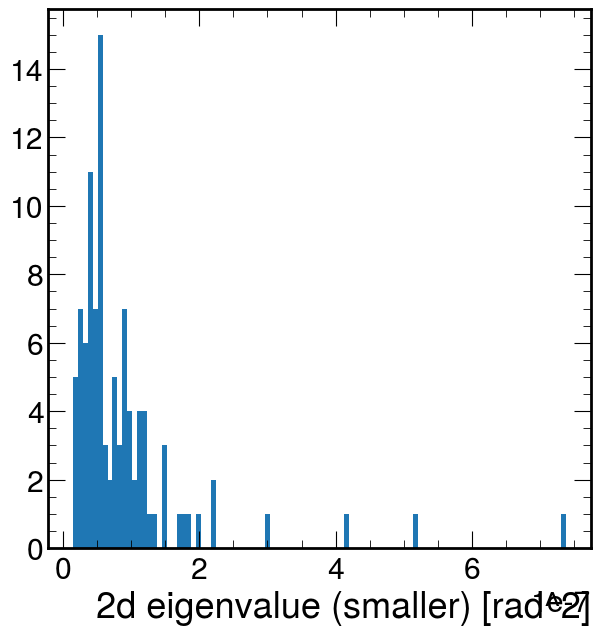

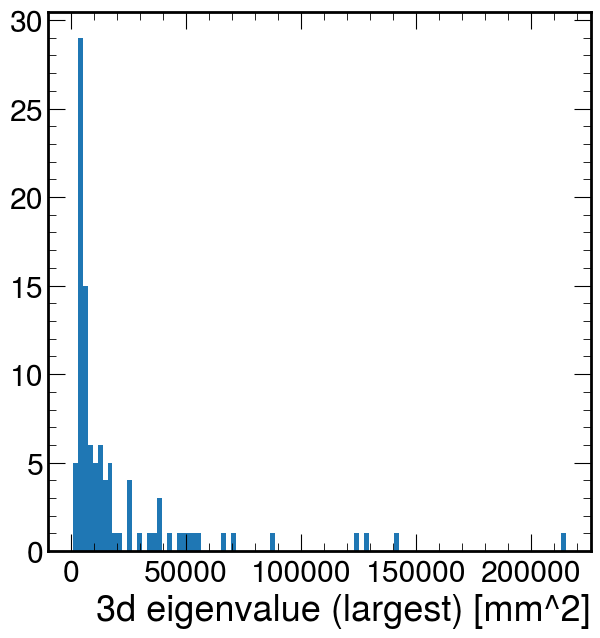

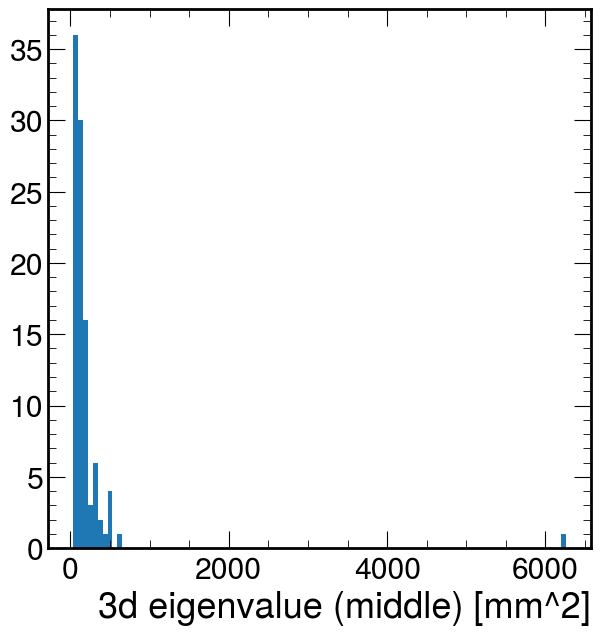

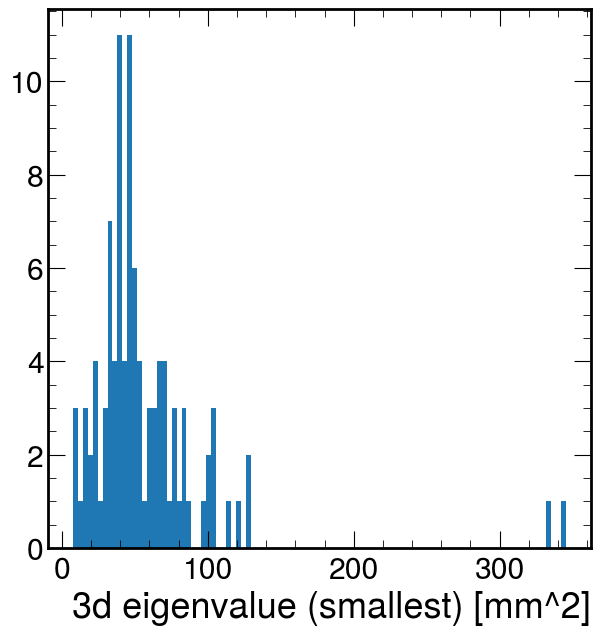

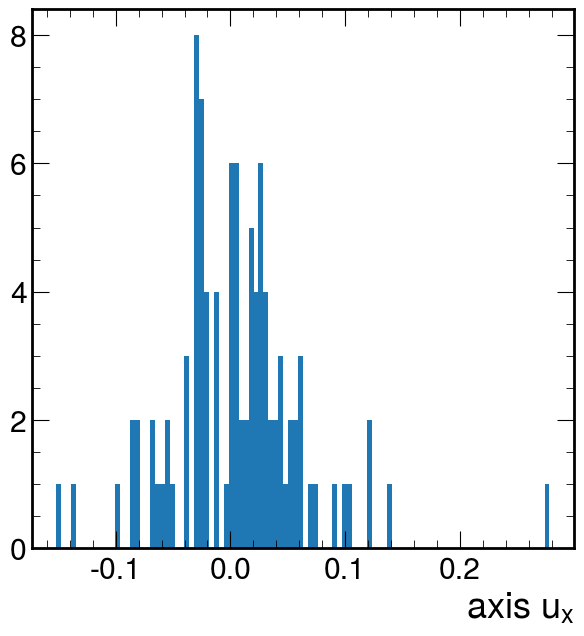

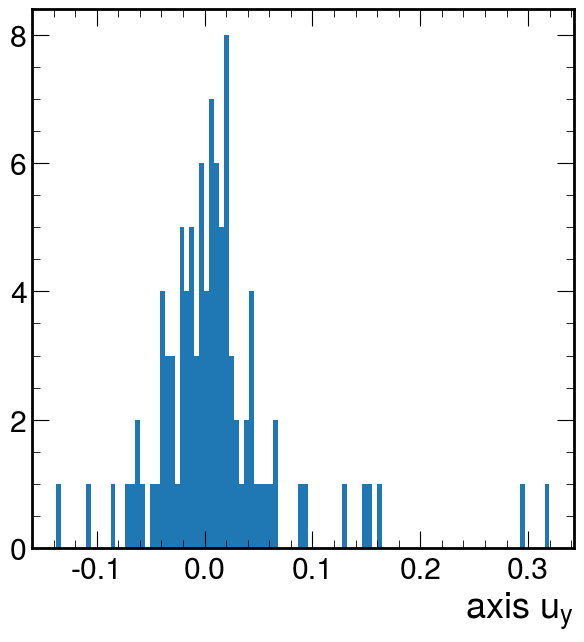

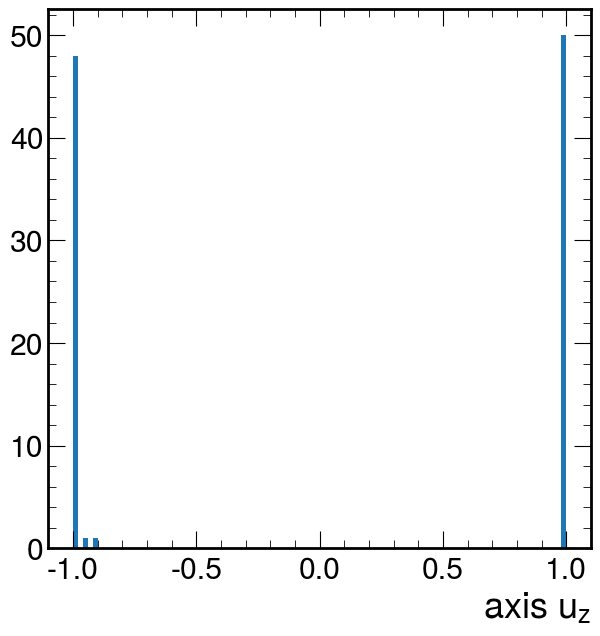

In [64]:
plt.hist(radii, bins=100)
plt.xlabel("3d radius (unweighted) [mm]")
plt.show()
plt.hist(dispersion, bins=100)
plt.xlabel("dispersion [mm]")
plt.show()
plt.hist(eig2d_1, bins=100)
plt.xlabel("2d eigenvalue (larger) [rad^2]")
plt.show()
plt.hist(eig2d_2, bins=100)
plt.xlabel("2d eigenvalue (smaller) [rad^2]")
plt.show()
plt.hist(eig3d_1, bins=100)
plt.xlabel("3d eigenvalue (largest) [mm^2]")
plt.show()
plt.hist(eig3d_2, bins=100)
plt.xlabel("3d eigenvalue (middle) [mm^2]")
plt.show()
plt.hist(eig3d_3, bins=100)
plt.xlabel("3d eigenvalue (smallest) [mm^2]")
plt.show()

plt.hist(axis_x, bins=100)
plt.xlabel("axis $u_x$")
plt.show()
plt.hist(axis_y, bins=100)
plt.xlabel("axis $u_y$")
plt.show()
plt.hist(axis_z, bins=100)
plt.xlabel("axis $u_z$")
plt.show()

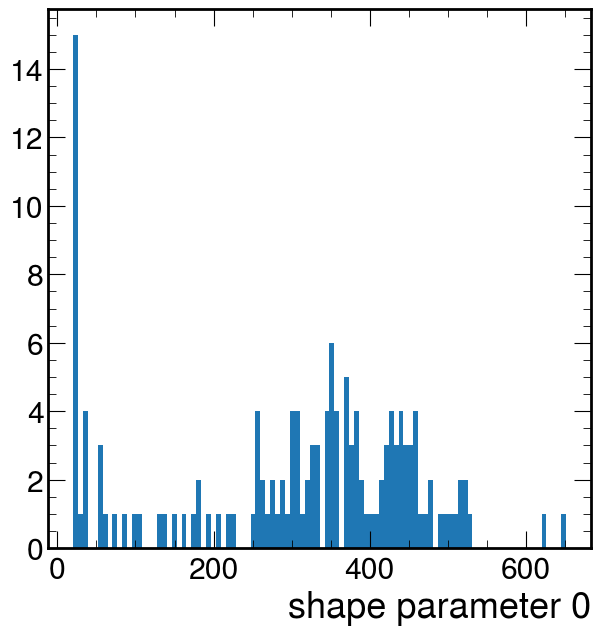

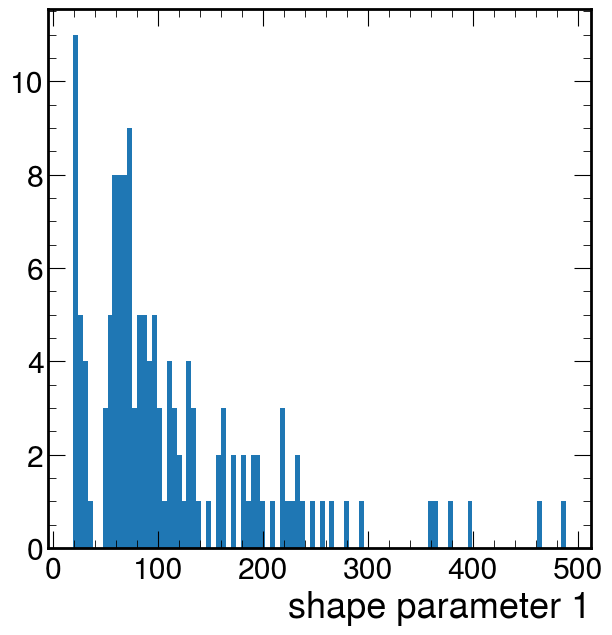

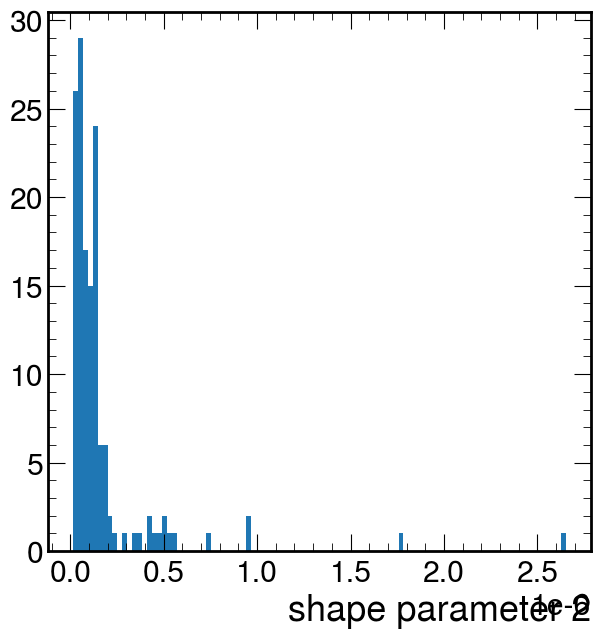

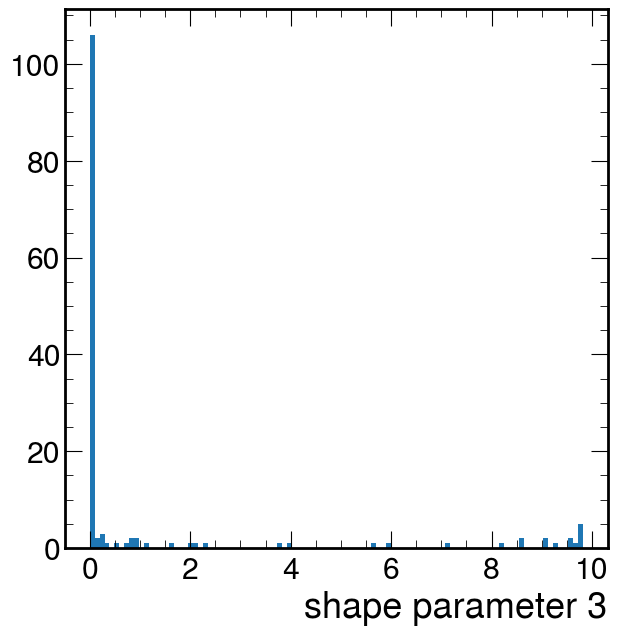

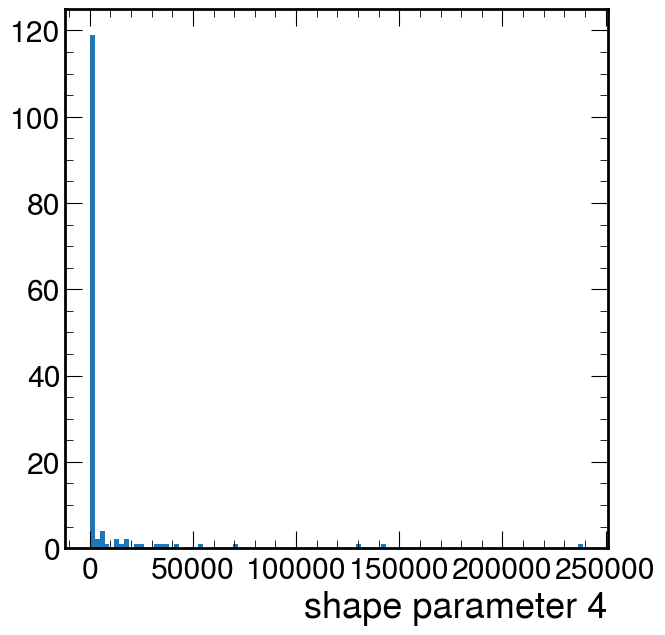

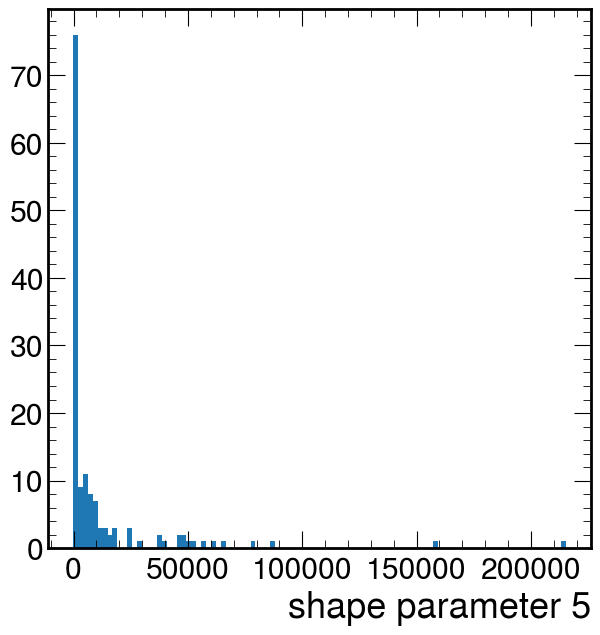

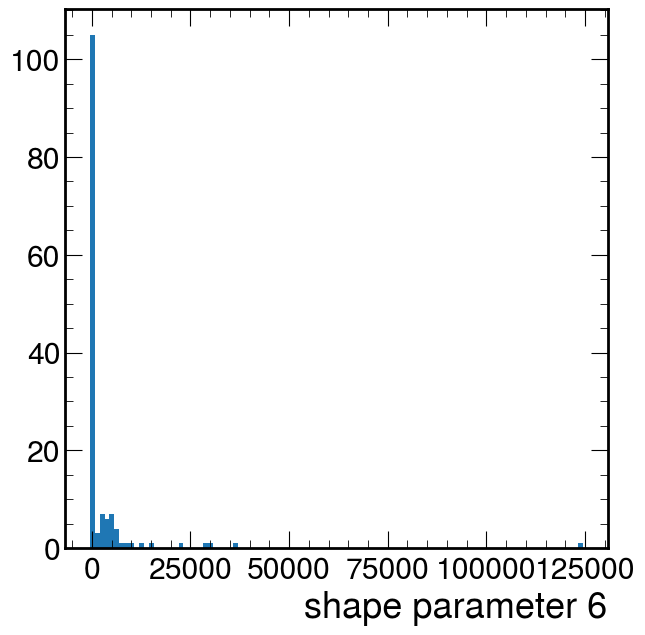

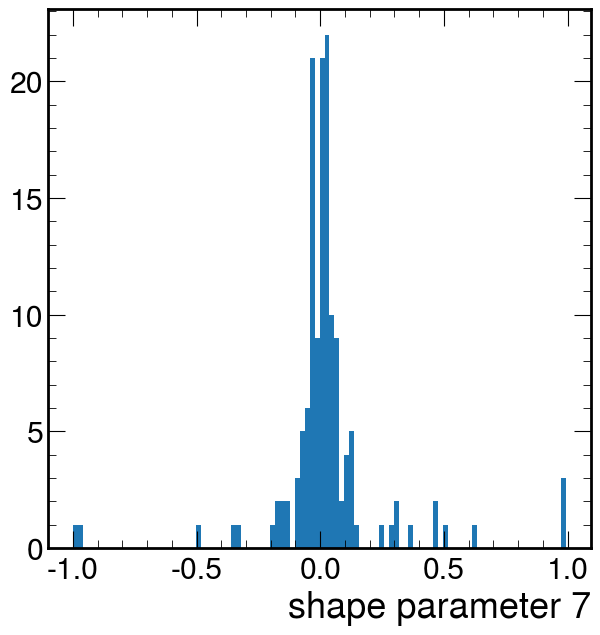

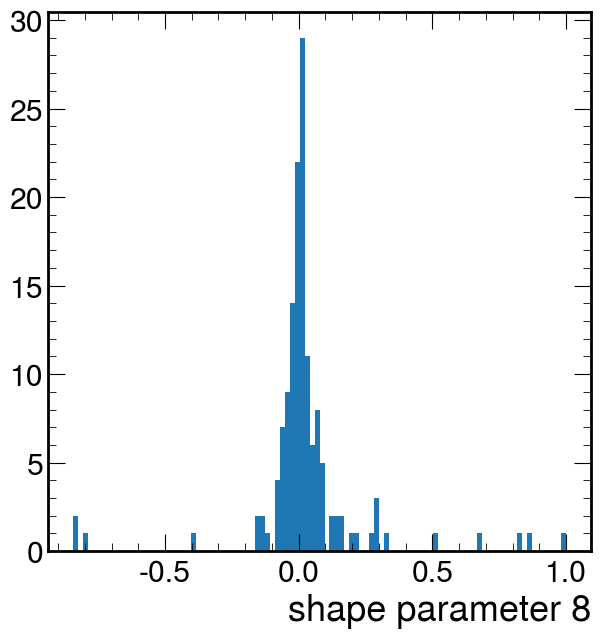

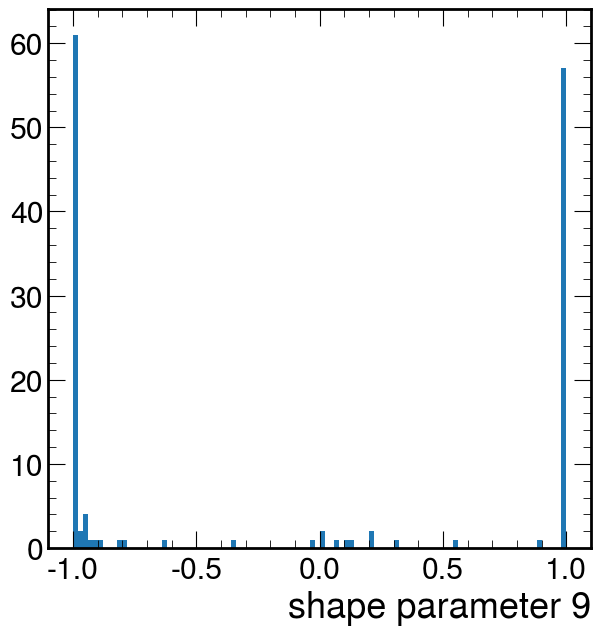

In [34]:
for i in range(10):
    plt.hist(shapeParameters[i], bins=100)
    plt.xlabel(f"shape parameter {i}")
    plt.show()

In [48]:
px=arrays_sim['MCParticles.momentum.x'][:,2]
py=arrays_sim['MCParticles.momentum.y'][:,2]
pz=arrays_sim['MCParticles.momentum.z'][:,2]

dx=px/pz
dy=py/pz

-0.0007622707742002959 0.03233325412091332


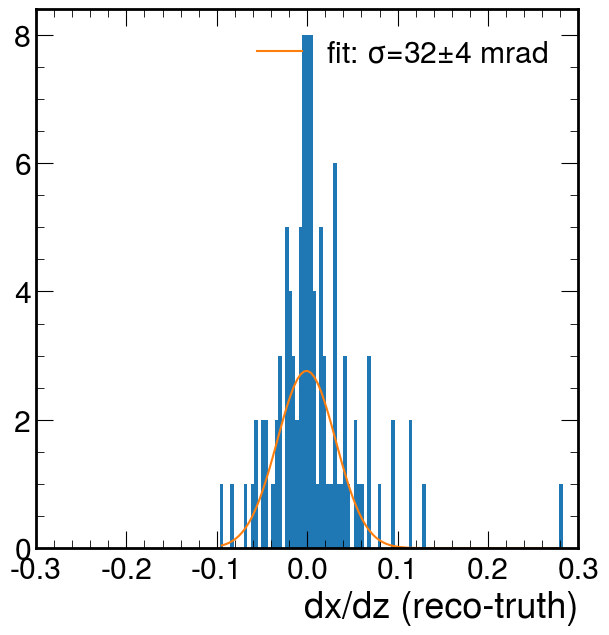

In [62]:
from scipy.optimize import curve_fit
def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))
y,x,_=plt.hist(dx-axis_x/axis_z, bins=100)

bc=(x[1:]+x[:-1])/2
p0=[10,0, 0.1]
slc=abs(bc)<.3
coeff, var_matrix = curve_fit(gauss, bc[slc], y[slc], p0=p0,
                                 sigma=np.sqrt(y[slc]+(y[slc]==0)))
mu=coeff[1]; sigma=coeff[2]
label=f'fit: $\sigma$={1000*abs(sigma):.0f}$\\pm${1000*np.sqrt(var_matrix[2][2]):.0f} mrad'
plt.errorbar(bc, gauss(bc,*coeff), label=label)
plt.xlabel("dx/dz (reco-truth)")
plt.xlim(-0.3, 0.3)
plt.legend()
print(mu, sigma)

-0.0029905633409302887 0.02753166720557439


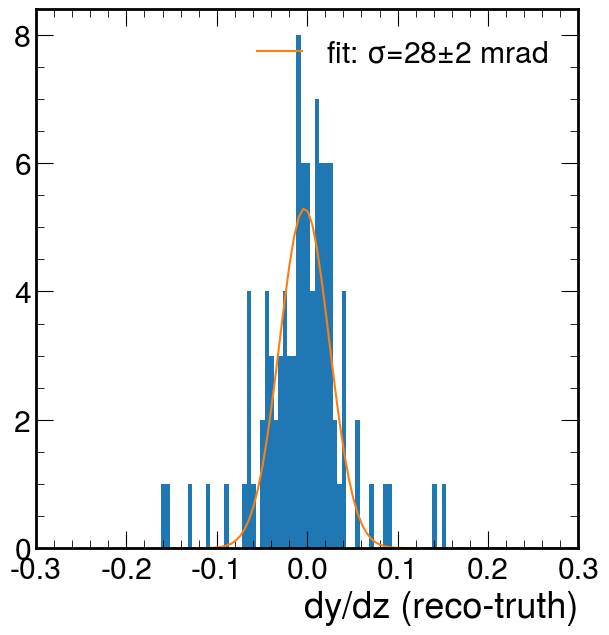

In [63]:
from scipy.optimize import curve_fit
def gauss(x, A,mu, sigma):
    return A * np.exp(-(x-mu)**2/(2*sigma**2))
y,x,_=plt.hist(dy-axis_y/axis_z, bins=100)

bc=(x[1:]+x[:-1])/2
p0=[10,0, 0.1]
slc=abs(bc)<.3
coeff, var_matrix = curve_fit(gauss, bc[slc], y[slc], p0=p0,
                                 sigma=np.sqrt(y[slc]+(y[slc]==0)))
mu=coeff[1]; sigma=coeff[2]
label=f'fit: $\sigma$={1000*abs(sigma):.0f}$\\pm${1000*np.sqrt(var_matrix[2][2]):.0f} mrad'
plt.errorbar(bc, gauss(bc,*coeff), label=label)
plt.xlabel("dy/dz (reco-truth)")
plt.xlim(-0.3, 0.3)
plt.legend()
print(mu, sigma)